### Code used for automatic generation of grids:
#### The main application is for generate centroids of sattelite precipitation data for instance (TRMM).


(a) The latitude and longitude are computed as being from left to right and from upper to down;

(b) Pay attention on where you have the space positive or negative, for instance, for Paraiba and TRMM, 0.25 is negative for latitude and positive for longitude. Try to pay attention on where is the (0, 0) of the equator and Greenwich. 

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [3]:
#Example for Paraiba state (TRMM):
#lat = np.arange(-5.875, -8.375, -0.25)
#lon = np.arange(-38.875, -34.875, -0.25)

# Lat and lon must be set with one extra, because python does not consider the last:

lat = np.arange(-5.875, -8.625, -0.25)
lon = np.arange(-38.875, -34.625, 0.25)

In [4]:
num_rows = len(lat) * len(lon)

coord_grids = pd.DataFrame(np.nan, index = range(num_rows), columns = [['Lat', 'Lon']])
coord_grids

,Lat,Lon
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
182,NaN,NaN
183,NaN,NaN
184,NaN,NaN
185,NaN,NaN


In [5]:
z = 0
for i in lat:
    j = 0
    for j in lon:
        coord_grids.iloc[z, 0]  = i
        coord_grids.iloc[z, 1] = j
        z = z + 1

In [6]:
coord_grids

,Lat,Lon
0,-5.875,-38.875
1,-5.875,-38.625
2,-5.875,-38.375
3,-5.875,-38.125
4,-5.875,-37.875
...,...,...
182,-8.375,-35.875
183,-8.375,-35.625
184,-8.375,-35.375
185,-8.375,-35.125


Visualization using geopandas:

In [46]:
coords_df = pd.DataFrame({'GridID': range(len(coord_grids)),
                         'Lat': coord_grids.Lat.values[:,0],
                         'Lon': coord_grids.Lon.values[:,0]})
coords_df.dtypes

GridID      int64
Lat       float64
Lon       float64
dtype: object

In [49]:
crs={'init':'epsg:4326'}

geometry=[Point(xy) for xy in zip(coords_df["Lon"], coords_df["Lat"])]
geodata=gpd.GeoDataFrame(coords_df,crs=crs, geometry=geometry)

C:\Users\User\anaconda3\envs\geopandas\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

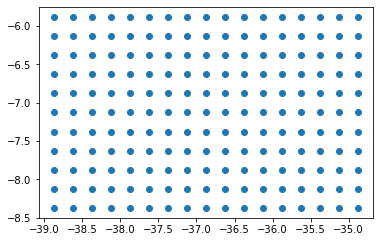

In [54]:
# Plot:
fig, ax = plt.subplots()
geodata.plot(ax=ax)